## Importar librerias y modulos

In [34]:
import requests
import json
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Carga de datasets 
- Generacion
- Capacidad
- Demanda


In [35]:
df_generacion = pd.read_csv('../data/Generacion.csv')
df_capacidad = pd.read_csv('Capacidad_fil.csv')
df_demanda = pd.read_csv('Demanda.csv')

'''#carga de dataset de demanda
dataset_id = '14fabb'              # Cambia este valor por el ID del dataset deseado
start_date = '2022-01-01'          # Fecha de inicio
end_date = '2025-11-05'            # Fecha de fin

df_demanda = descargar_datos_simem(dataset_id, start_date, end_date)
if df_demanda is not None:
    print(df_demanda.head())'''


"#carga de dataset de demanda\ndataset_id = '14fabb'              # Cambia este valor por el ID del dataset deseado\nstart_date = '2022-01-01'          # Fecha de inicio\nend_date = '2025-11-05'            # Fecha de fin\n\ndf_demanda = descargar_datos_simem(dataset_id, start_date, end_date)\nif df_demanda is not None:\n    print(df_demanda.head())"

## Visualzación de datos crudos

In [36]:
df_demanda

,FechaHora,Valor
0,2023-06-01T23:00:00,5106.44
1,2023-06-01T22:00:00,5106.82
2,2023-06-01T21:00:00,5104.55
3,2023-06-01T20:00:00,5095.07
4,2023-06-01T19:00:00,5096.44
...,...,...
3349603,2022-11-26T04:00:00,749.75
3349604,2022-11-26T03:00:00,770.69
3349605,2022-11-26T02:00:00,823.09
3349606,2022-11-26T01:00:00,862.68


In [37]:
df_generacion

,Fecha,CodigoPlanta,TipoGeneracion,TipoClasificacion,TipoDespachoRecurso,GeneracionRealEstimada,GeneracionProgramadaDespacho,GeneracionProgramadaRedespacho
0,2019-12-30,2T4P,Hidraulica,Hidraulica,No Despachado Centralmente,301801.06,354240.00,354240.00
1,2019-12-30,TFL1,Termica,Termica,Despachado Centralmente,0.00,0.00,0.00
2,2019-12-30,MNT1,Hidraulica,Hidraulica,No Despachado Centralmente,41952.37,43200.00,43200.00
3,2019-12-30,VNTA,Hidraulica,Hidraulica,No Despachado Centralmente,54232.03,40560.00,40560.00
4,2019-12-30,2VJS,Solar,Solar,No Despachado Centralmente,44690.88,44690.88,44690.88
...,...,...,...,...,...,...,...,...
1091675,2018-09-22,PPA2,Termica,Termica,Despachado Centralmente,0.00,0.00,0.00
1091676,2018-09-22,2TYI,Termica,AUTOGENERADOR,No Despachado Centralmente,8916.00,8000.00,8000.00
1091677,2018-09-22,INZ1,Hidraulica,Hidraulica,No Despachado Centralmente,11586.31,12000.00,12000.00
1091678,2018-09-22,RMR1,Hidraulica,Hidraulica,No Despachado Centralmente,33636.83,47000.00,47000.00


In [38]:
df_capacidad_fil = df_capacidad
df_capacidad_fil

,Fecha,Capacidad acumulada [MW]
0,2022-01-01,17263.26200
1,2022-01-02,17263.26200
2,2022-01-03,17263.26200
3,2022-01-04,17263.26200
4,2022-01-05,17263.26200
...,...,...
3282,2030-12-27,25235.99716
3283,2030-12-28,25238.52280
3284,2030-12-29,25241.05707
3285,2030-12-30,25243.60062


## Columnas de interes:
- df_generacion: Fecha y GeneracionRealEstimada (kW)
- df_demanda: AnioEstudio, MesEstudio y DemandaSIN (kW)

In [39]:
df_generacion_fil = df_generacion[['Fecha', 'GeneracionRealEstimada']]
df_demanda_fil = df_demanda[['FechaHora','Valor']]


In [40]:
df_demanda_fil.head()
df_demanda_fil.to_csv('Demanda.csv',index = False)

In [41]:
df_demanda_fil

,FechaHora,Valor
0,2023-06-01T23:00:00,5106.44
1,2023-06-01T22:00:00,5106.82
2,2023-06-01T21:00:00,5104.55
3,2023-06-01T20:00:00,5095.07
4,2023-06-01T19:00:00,5096.44
...,...,...
3349603,2022-11-26T04:00:00,749.75
3349604,2022-11-26T03:00:00,770.69
3349605,2022-11-26T02:00:00,823.09
3349606,2022-11-26T01:00:00,862.68


In [42]:
df_generacion_fil

,Fecha,GeneracionRealEstimada
0,2019-12-30,301801.06
1,2019-12-30,0.00
2,2019-12-30,41952.37
3,2019-12-30,54232.03
4,2019-12-30,44690.88
...,...,...
1091675,2018-09-22,0.00
1091676,2018-09-22,8916.00
1091677,2018-09-22,11586.31
1091678,2018-09-22,33636.83


# Funciones


Función para convertir de AAAA-MM-DD a AAAA-MM: 
- Se toman los valores de GeneracionRealEstimada diarios y se suman a un total mensual

In [43]:
# Función para totalizar los valores por día
def preparar_datos_diarios(df, fecha_col='Fecha', valor_col='GeneracionRealEstimada'):
    """
    Agrupa los datos por día y suma todos los valores de cada fecha.
    Si hay múltiples registros por día (por ejemplo, por hora), los totaliza.
    
    - df: DataFrame con columna de fecha y valores.
    - fecha_col: nombre de columna de fecha.
    - valor_col: nombre de columna con valores.
    
    Retorna un DataFrame con columnas: 'Fecha' (AAAA-MM-DD) y 'Valor' (suma diaria)
    """
    # Convertir columna de fecha a datetime
    df = df.copy()
    df[fecha_col] = pd.to_datetime(df[fecha_col])
    
    # Extraer solo la fecha (sin hora) para agrupar por día
    df['Fecha_Dia'] = df[fecha_col].dt.date
    
    # Agrupar por fecha y sumar todos los valores del mismo día
    resultado = df.groupby('Fecha_Dia')[valor_col].sum().reset_index()
    resultado.columns = ['Fecha', 'Valor']
    
    # Convertir de nuevo a datetime para mantener consistencia
    resultado['Fecha'] = pd.to_datetime(resultado['Fecha'])
    
    # Ordenar por fecha
    resultado = resultado.sort_values('Fecha').reset_index(drop=True)
    
    return resultado


# Función para normalizar los datos en formato Kw
def normalizar_a_gwh(df, valor_col='Valor'):
    df = df.copy()
    # Cambiar de MWh a GWh (dividir por 1000, no por 1e9)
    df['Valor_KWh'] = df[valor_col] / 1000  # O verificar unidades originales
    df = df[['Fecha', 'Valor_KWh']]
    return df

# función para descargar los datos por la API de SIMEM
def descargar_datos_simem(dataset_id, start_date, end_date):
    """
    Descarga y retorna un DataFrame con los datos del SiMEM según dataset_id y fechas.
    """
    url = (f"https://www.simem.co/backend-files/api/datos-publicos?"
           f"datasetId={dataset_id}&startDate={start_date}&endDate={end_date}")
    parameters = []
    buffer = ""
    # Solicitud POST con streaming
    with requests.post(url, json=parameters, stream=True) as response:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                buffer += chunk.decode('utf-8')
    try:
        data = json.loads(buffer)
        df = pd.DataFrame(data)
        return df
    except json.JSONDecodeError as e:
        print("Error al decodificar JSON:", e)
        return None

## Modelos de maching learning



============== PIPELINE PREDICCIÓN ENERGÉTICA 2022-2030 ==============

[PASO 1] PREPARACIÓN DE DATOS DE GENERACIÓN
----------------------------------------------------------------------
✓ Datos diarios agregados: 1382 días
✓ Rango: 2022-01-01 a 2025-10-13
✓ Promedio: 221.94 GWh/día

[PASO 2] PREPARACIÓN DE DATOS DE DEMANDA
----------------------------------------------------------------------


21:58:14 - cmdstanpy - INFO - Chain [1] start processing


✓ Datos diarios agregados: 1405 días
✓ Promedio: 241.39 GWh/día

DETECCIÓN DE OUTLIERS - IQR
Q1 (25%): 208.02 GWh
Q3 (75%): 228.95 GWh
IQR: 20.93 GWh
Límite inferior: 145.24 GWh
Límite superior: 291.73 GWh
Outliers detectados: 122 (8.68%)

Días con outliers:
          Fecha   Valor_GWh
1397 2025-10-29  719.300480
1396 2025-10-28  717.758913
1364 2025-09-26  717.228612
1398 2025-10-30  712.245334
1375 2025-10-07  712.206119
...         ...         ...
1212 2025-04-27  400.187016
1324 2025-08-17  398.172516
1317 2025-08-10  397.727549
1191 2025-04-06  397.721475
1203 2025-04-18  388.367024

[122 rows x 2 columns]

CORRECCIÓN DE OUTLIERS
Outliers detectados: 122
Valor de reemplazo (mediana): 217.68 GWh
✓ Outliers corregidos
✓ Promedio post-corrección: 215.08 GWh/día

[PASO 3] MODELADO DE GENERACIÓN
----------------------------------------------------------------------

ENTRENAMIENTO Y COMPARACIÓN DE MODELOS

Total registros: 1382 días
Entrenamiento: 1292 días
Prueba: 90 días

[1/3] Entren

21:58:14 - cmdstanpy - INFO - Chain [1] done processing
21:58:14 - cmdstanpy - INFO - Chain [1] start processing



RESULTADOS DE EVALUACIÓN

Random Forest:
  MAE: 11.2036
  RMSE: 13.7459
  R2: -0.0008

Regresion Lineal:
  MAE: 11.2680
  RMSE: 13.8016
  R2: -0.0090

Prophet:
  MAE: 7.3441
  RMSE: 8.7329
  R2: 0.5960

🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
MEJOR MODELO: Prophet
MAE: 7.3441 GWh
RMSE: 8.7329 GWh
R²: 0.5960
🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆

Reentrenando Prophet con todos los datos...


21:58:14 - cmdstanpy - INFO - Chain [1] done processing


Generando predicciones hasta 2030-12-31...

✓ Predicciones generadas: 1905 días

Primeras 10 predicciones:
       Fecha  Prediccion_GWh
0 2025-10-14      238.100730
1 2025-10-15      239.469049
2 2025-10-16      239.689460
3 2025-10-17      239.740964
4 2025-10-18      227.905889
5 2025-10-19      208.142619
6 2025-10-20      234.440713
7 2025-10-21      237.581331
8 2025-10-22      239.035868
9 2025-10-23      239.321129

Últimas 10 predicciones (2030):
          Fecha  Prediccion_GWh
1895 2030-12-22      224.954239
1896 2030-12-23      252.706048
1897 2030-12-24      255.113047
1898 2030-12-25      225.601508
1899 2030-12-26      255.210761
1900 2030-12-27      254.580404
1901 2030-12-28      241.017768
1902 2030-12-29      218.880896
1903 2030-12-30      247.430307
1904 2030-12-31      250.713168

[PASO 4] MODELADO DE DEMANDA
----------------------------------------------------------------------

ESTIMACIÓN DE DEMANDA (MÉTODO PROXY)
✓ Días históricos alineados: 1382
✓ Ratio Demanda/

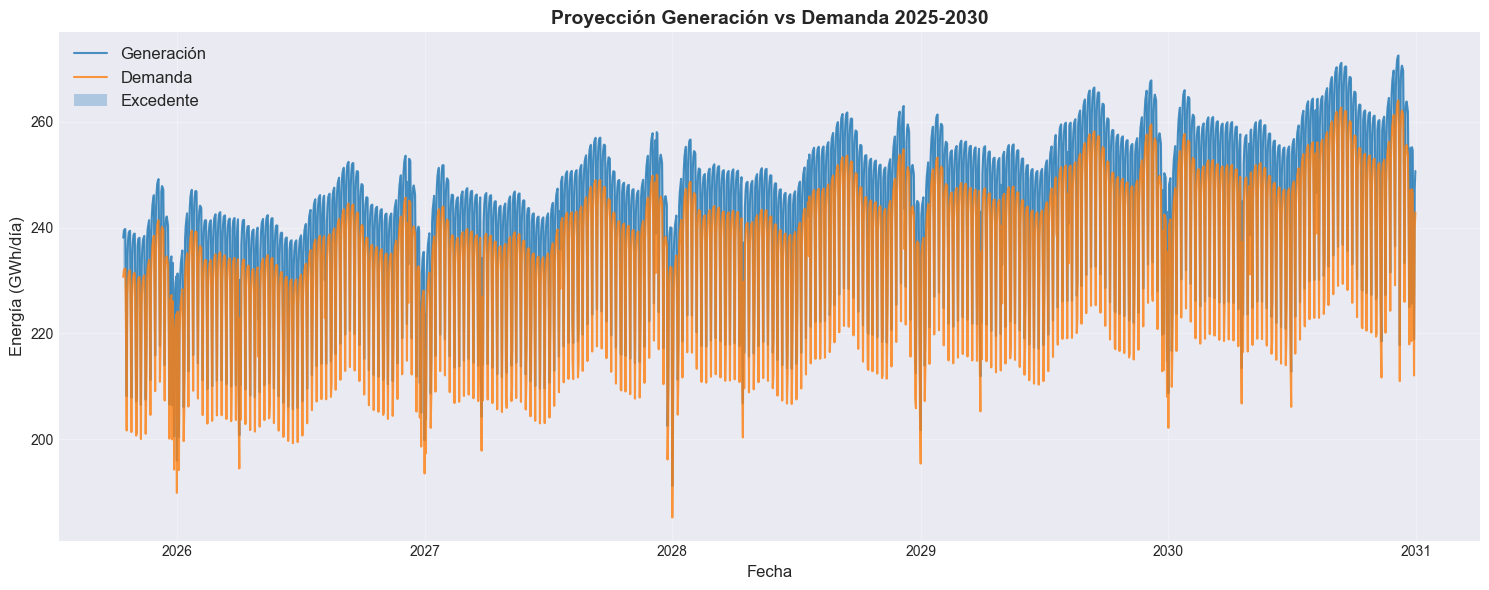



=========================== RESUMEN FINAL ============================

..............................GENERACIÓN..............................
  Modelo: Prophet
  R²: 0.5960
  MAE: 7.34 GWh
  Rango predicciones: 191.17 - 272.56 GWh

...............................DEMANDA................................
  Método: Proxy desde generación
  Ratio D/G: 0.9688
  MAE validación: 6.96 GWh
  R² validación: 0.2904
  Rango predicciones: 185.21 - 264.06 GWh

..........................BALANCE ENERGÉTICO..........................
  Excedente promedio: 7.60 GWh/día
  % Pérdidas técnicas: 3.12%

================== PIPELINE COMPLETADO EXITOSAMENTE ==================



In [56]:
"""
=============================================================================
PIPELINE COMPLETO: PREDICCIÓN DE GENERACIÓN Y DEMANDA ENERGÉTICA 2022-2030
=============================================================================
Autor: [Tu nombre]
Fecha: 2025-11-12
Descripción: Pipeline completo de análisis predictivo del mercado energético
            colombiano utilizando datos históricos de XM.
"""

import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# 1. FUNCIONES DE PREPARACIÓN DE DATOS
# =============================================================================

def preparar_datos_diarios(df, fecha_col='Fecha', valor_col='GeneracionRealEstimada'):
    """
    Agrupa datos por día y suma todos los valores de cada fecha.
    
    Parámetros:
    -----------
    df : DataFrame con datos horarios/sub-horarios
    fecha_col : nombre de columna de fecha
    valor_col : nombre de columna con valores en kWh
    
    Retorna:
    --------
    DataFrame con suma diaria: ['Fecha', 'Valor']
    """
    df = df.copy()
    df[fecha_col] = pd.to_datetime(df[fecha_col])
    
    # Extraer solo la fecha (sin hora)
    df['Fecha_Dia'] = df[fecha_col].dt.date
    
    # Agrupar por fecha y sumar
    resultado = df.groupby('Fecha_Dia')[valor_col].sum().reset_index()
    resultado.columns = ['Fecha', 'Valor']
    
    # Convertir de nuevo a datetime
    resultado['Fecha'] = pd.to_datetime(resultado['Fecha'])
    resultado = resultado.sort_values('Fecha').reset_index(drop=True)
    
    return resultado

def normalizar_a_gwh(df, valor_col='Valor'):
    """
    Convierte de kWh a GWh.
    1 GWh = 1,000,000 kWh
    
    Parámetros:
    -----------
    df : DataFrame con valores en kWh
    valor_col : nombre de columna a convertir
    
    Retorna:
    --------
    DataFrame con valores en GWh
    """
    df = df.copy()
    df['Valor_GWh'] = df[valor_col] / 1_000_000  # kWh → GWh
    df = df[['Fecha', 'Valor_GWh']]
    return df

def identificar_outliers(df, col_valor='Valor_GWh', metodo='iqr', factor=3):
    """
    Identifica outliers usando método IQR.
    
    Parámetros:
    -----------
    df : DataFrame con datos diarios
    col_valor : columna con valores
    metodo : método de detección ('iqr')
    factor : factor multiplicador del IQR (default: 3 para ser conservador)
    
    Retorna:
    --------
    DataFrame con solo los outliers detectados
    """
    Q1 = df[col_valor].quantile(0.25)
    Q3 = df[col_valor].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    outliers = df[(df[col_valor] < lower_bound) | (df[col_valor] > upper_bound)]
    
    print(f"\n{'='*70}")
    print(f"DETECCIÓN DE OUTLIERS - {metodo.upper()}")
    print(f"{'='*70}")
    print(f"Q1 (25%): {Q1:.2f} GWh")
    print(f"Q3 (75%): {Q3:.2f} GWh")
    print(f"IQR: {IQR:.2f} GWh")
    print(f"Límite inferior: {lower_bound:.2f} GWh")
    print(f"Límite superior: {upper_bound:.2f} GWh")
    print(f"Outliers detectados: {len(outliers)} ({100*len(outliers)/len(df):.2f}%)")
    
    if len(outliers) > 0:
        print(f"\nDías con outliers:")
        print(outliers[['Fecha', col_valor]].sort_values(col_valor, ascending=False))
    
    return outliers

def corregir_outliers(df, col_valor='Valor_GWh', metodo='mediana', factor=3):
    """
    Corrige outliers reemplazándolos con la mediana.
    
    Parámetros:
    -----------
    df : DataFrame
    col_valor : columna con valores
    metodo : 'mediana' o 'media'
    factor : factor del IQR para detección
    
    Retorna:
    --------
    DataFrame con outliers corregidos
    """
    df = df.copy()
    
    Q1 = df[col_valor].quantile(0.25)
    Q3 = df[col_valor].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    
    # Valor de reemplazo
    if metodo == 'mediana':
        valor_reemplazo = df[col_valor].median()
    else:
        valor_reemplazo = df[col_valor].mean()
    
    # Identificar y reemplazar
    mask_outliers = (df[col_valor] < lower) | (df[col_valor] > upper)
    n_outliers = mask_outliers.sum()
    
    print(f"\n{'='*70}")
    print(f"CORRECCIÓN DE OUTLIERS")
    print(f"{'='*70}")
    print(f"Outliers detectados: {n_outliers}")
    print(f"Valor de reemplazo ({metodo}): {valor_reemplazo:.2f} GWh")
    
    df.loc[mask_outliers, col_valor] = valor_reemplazo
    
    print(f"✓ Outliers corregidos")
    
    return df

def filtrar_por_fecha(df, fecha_inicio='2022-01-01', fecha_fin=None):
    """
    Filtra DataFrame por rango de fechas.
    """
    df = df.copy()
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    
    if fecha_inicio:
        df = df[df['Fecha'] >= fecha_inicio]
    if fecha_fin:
        df = df[df['Fecha'] <= fecha_fin]
    
    return df.reset_index(drop=True)

# =============================================================================
# 2. FUNCIONES DE MODELADO
# =============================================================================

def preparar_datos_ml_diario(df, col_fecha='Fecha', col_valor='Valor_GWh'):
    """
    Prepara datos para modelos de ML (RF, LR).
    """
    df = df.copy()
    df[col_fecha] = pd.to_datetime(df[col_fecha])
    df = df.sort_values(col_fecha).reset_index(drop=True)
    
    fecha_inicio = df[col_fecha].min()
    df['dias_desde_inicio'] = (df[col_fecha] - fecha_inicio).dt.days
    
    X = df[['dias_desde_inicio']].values
    y = df[col_valor].values
    return X, y, df, fecha_inicio

def preparar_datos_prophet(df, col_fecha='Fecha', col_valor='Valor_GWh'):
    """
    Prepara datos para Prophet.
    """
    df = df.copy()
    df['ds'] = pd.to_datetime(df[col_fecha])
    df['y'] = df[col_valor]
    return df[['ds', 'y']]

def entrenar_prophet_generacion(df):
    """
    Entrena Prophet optimizado para generación.
    """
    df_prophet = preparar_datos_prophet(df)
    
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=10,
        seasonality_mode='multiplicative',
        interval_width=0.95,
        n_changepoints=25,
        changepoint_range=0.8
    )
    
    model.add_country_holidays(country_name='CO')
    model.fit(df_prophet)
    
    return model

def predecir_hasta_2030(model, df_prep, fecha_inicio, tipo='prophet'):
    """
    Genera predicciones hasta 2030-12-31.
    """
    ultima_fecha = pd.to_datetime(df_prep['Fecha'].max())
    fecha_final = pd.Timestamp('2030-12-31')
    
    fechas_futuras = pd.date_range(
        start=ultima_fecha + pd.Timedelta(days=1),
        end=fecha_final,
        freq='D'
    )
    
    if tipo == 'prophet':
        future = pd.DataFrame({'ds': fechas_futuras})
        forecast = model.predict(future)
        predicciones = forecast['yhat'].values
    else:
        # Para RF o LR
        ultimo_dia = df_prep['dias_desde_inicio'].max()
        dias_futuros = np.arange(
            ultimo_dia + 1,
            ultimo_dia + 1 + len(fechas_futuras)
        ).reshape(-1, 1)
        predicciones = model.predict(dias_futuros)
    
    df_futuro = pd.DataFrame({
        'Fecha': fechas_futuras,
        'Prediccion_GWh': predicciones
    })
    
    return df_futuro

def comparar_modelos(df, col_fecha='Fecha', col_valor='Valor_GWh'):
    """
    Compara Random Forest, Regresión Lineal y Prophet.
    Retorna el mejor modelo y sus predicciones.
    """
    print(f"\n{'='*70}")
    print("ENTRENAMIENTO Y COMPARACIÓN DE MODELOS")
    print(f"{'='*70}\n")
    
    # Preparar datos
    X, y, df_prep, fecha_inicio = preparar_datos_ml_diario(df, col_fecha, col_valor)
    df_prophet = preparar_datos_prophet(df, col_fecha, col_valor)
    
    # Split train/test (últimos 90 días)
    split = len(X) - 90
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    df_prophet_train = df_prophet.iloc[:split]
    
    print(f"Total registros: {len(X)} días")
    print(f"Entrenamiento: {len(X_train)} días")
    print(f"Prueba: {len(X_test)} días\n")
    
    resultados = {}
    
    # Random Forest
    print("[1/3] Entrenando Random Forest...")
    rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    resultados['Random Forest'] = {
        'modelo': rf,
        'metricas': {
            'MAE': mean_absolute_error(y_test, rf_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred)),
            'R2': r2_score(y_test, rf_pred)
        },
        'tipo': 'ml'
    }
    
    # Regresión Lineal
    print("[2/3] Entrenando Regresión Lineal...")
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    resultados['Regresion Lineal'] = {
        'modelo': lr,
        'metricas': {
            'MAE': mean_absolute_error(y_test, lr_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, lr_pred)),
            'R2': r2_score(y_test, lr_pred)
        },
        'tipo': 'ml'
    }
    
    # Prophet
    print("[3/3] Entrenando Prophet...")
    prophet = entrenar_prophet_generacion(df.iloc[:split])
    future_test = pd.DataFrame({'ds': df_prophet.iloc[split:]['ds']})
    prophet_forecast = prophet.predict(future_test)
    prophet_pred = prophet_forecast['yhat'].values
    resultados['Prophet'] = {
        'modelo': prophet,
        'metricas': {
            'MAE': mean_absolute_error(y_test, prophet_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, prophet_pred)),
            'R2': r2_score(y_test, prophet_pred)
        },
        'tipo': 'prophet'
    }
    
    # Mostrar resultados
    print(f"\n{'='*70}")
    print("RESULTADOS DE EVALUACIÓN")
    print(f"{'='*70}\n")
    for nombre, info in resultados.items():
        print(f"{nombre}:")
        for metrica, valor in info['metricas'].items():
            print(f"  {metrica}: {valor:.4f}")
        print()
    
    # Mejor modelo
    mejor_nombre = min(resultados, key=lambda x: resultados[x]['metricas']['MAE'])
    mejor_info = resultados[mejor_nombre]
    
    print(f"{'🏆'*35}")
    print(f"MEJOR MODELO: {mejor_nombre}")
    print(f"MAE: {mejor_info['metricas']['MAE']:.4f} GWh")
    print(f"RMSE: {mejor_info['metricas']['RMSE']:.4f} GWh")
    print(f"R²: {mejor_info['metricas']['R2']:.4f}")
    print(f"{'🏆'*35}\n")
    
    # Reentrenar con todos los datos
    print(f"Reentrenando {mejor_nombre} con todos los datos...")
    if mejor_info['tipo'] == 'prophet':
        mejor_modelo_final = entrenar_prophet_generacion(df)
    elif mejor_nombre == 'Random Forest':
        mejor_modelo_final = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
        mejor_modelo_final.fit(X, y)
    else:
        mejor_modelo_final = LinearRegression()
        mejor_modelo_final.fit(X, y)
    
    # Predicciones hasta 2030
    print("Generando predicciones hasta 2030-12-31...")
    predicciones = predecir_hasta_2030(
        mejor_modelo_final,
        df_prep,
        fecha_inicio,
        mejor_info['tipo']
    )
    
    print(f"\n✓ Predicciones generadas: {len(predicciones)} días\n")
    print("Primeras 10 predicciones:")
    print(predicciones.head(10))
    print("\nÚltimas 10 predicciones (2030):")
    print(predicciones.tail(10))
    
    return mejor_nombre, mejor_modelo_final, predicciones, resultados

# =============================================================================
# 3. FUNCIÓN PARA DEMANDA (MÉTODO PROXY)
# =============================================================================

def estimar_demanda_proxy(pred_gen, df_demanda_hist, df_gen_hist):
    """
    Estima demanda usando generación como proxy.
    CORREGIDO: Alinea fechas históricas.
    """
    pred_demanda = pred_gen.copy()
    
    # Alinear datos históricos por fecha
    df_hist_merged = pd.merge(
        df_gen_hist[['Fecha', 'Valor_GWh']],
        df_demanda_hist[['Fecha', 'Valor_GWh']],
        on='Fecha',
        suffixes=('_gen', '_dem')
    )
    
    # Calcular ratio con fechas alineadas
    ratio = df_hist_merged['Valor_GWh_dem'].mean() / df_hist_merged['Valor_GWh_gen'].mean()
    
    # Aplicar
    pred_demanda['Prediccion_GWh'] = pred_demanda['Prediccion_GWh'] * ratio
    
    print(f"\n{'='*70}")
    print("ESTIMACIÓN DE DEMANDA (MÉTODO PROXY)")
    print(f"{'='*70}")
    print(f"✓ Días históricos alineados: {len(df_hist_merged)}")
    print(f"✓ Ratio Demanda/Generación: {ratio:.4f}")
    print(f"✓ Demanda histórica promedio: {df_hist_merged['Valor_GWh_dem'].mean():.2f} GWh")
    print(f"✓ Demanda proyectada promedio: {pred_demanda['Prediccion_GWh'].mean():.2f} GWh")
    
    print("\nPrimeras 10 predicciones:")
    print(pred_demanda.head(10))
    print("\nÚltimas 10 predicciones (2030):")
    print(pred_demanda.tail(10))
    
    return pred_demanda, ratio

# =============================================================================
# 4. VALIDACIÓN
# =============================================================================

def validacion_simple_proxy(df_gen, df_dem):
    """
    Validación 75% train / 25% test para método proxy.
    CORREGIDO: Alinea fechas entre generación y demanda.
    """
    # Alinear fechas
    df_gen = df_gen.sort_values('Fecha').reset_index(drop=True)
    df_dem = df_dem.sort_values('Fecha').reset_index(drop=True)
    
    # Merge por fecha para asegurar alineación
    df_merged = pd.merge(df_gen, df_dem, on='Fecha', suffixes=('_gen', '_dem'))
    
    print(f"✓ Fechas alineadas: {len(df_merged)} días comunes")
    print(f"  Generación original: {len(df_gen)} días")
    print(f"  Demanda original: {len(df_dem)} días")
    
    # Split 75/25
    split = int(len(df_merged) * 0.75)
    
    train = df_merged.iloc[:split]
    test = df_merged.iloc[split:]
    
    # Calcular ratio
    ratio = train['Valor_GWh_dem'].mean() / train['Valor_GWh_gen'].mean()
    
    # Predecir
    dem_pred = test['Valor_GWh_gen'].values * ratio
    
    # Evaluar
    mae = mean_absolute_error(test['Valor_GWh_dem'], dem_pred)
    rmse = np.sqrt(mean_squared_error(test['Valor_GWh_dem'], dem_pred))
    r2 = r2_score(test['Valor_GWh_dem'], dem_pred)
    
    print(f"\n{'='*70}")
    print("VALIDACIÓN MÉTODO PROXY (75% TRAIN / 25% TEST)")
    print(f"{'='*70}")
    print(f"Período train: {train['Fecha'].min().date()} a {train['Fecha'].max().date()}")
    print(f"Período test: {test['Fecha'].min().date()} a {test['Fecha'].max().date()}")
    print(f"\nRatio calculado: {ratio:.4f}")
    print(f"MAE: {mae:.2f} GWh ({100*mae/test['Valor_GWh_dem'].mean():.2f}% error relativo)")
    print(f"RMSE: {rmse:.2f} GWh")
    print(f"R²: {r2:.4f}")
    
    return {'ratio': ratio, 'MAE': mae, 'RMSE': rmse, 'R2': r2}


# =============================================================================
# 5. EXPORTACIÓN Y VISUALIZACIÓN
# =============================================================================

def consolidar_y_exportar(pred_gen, pred_dem):
    """
    Consolida predicciones y exporta a CSV.
    """
    pred_consolidado = pred_gen[['Fecha', 'Prediccion_GWh']].copy()
    pred_consolidado.columns = ['Fecha', 'Generacion_GWh']
    pred_consolidado['Demanda_GWh'] = pred_dem['Prediccion_GWh'].values
    pred_consolidado['Balance_GWh'] = (
        pred_consolidado['Generacion_GWh'] - pred_consolidado['Demanda_GWh']
    )
    
    # Exportar
    pred_consolidado.to_csv('predicciones_energia_2030_completo.csv', index=False)
    pred_gen.to_csv('predicciones_generacion_2030.csv', index=False)
    pred_dem.to_csv('predicciones_demanda_2030.csv', index=False)
    
    print(f"\n{'='*70}")
    print("ARCHIVOS EXPORTADOS")
    print(f"{'='*70}")
    print("✓ predicciones_energia_2030_completo.csv")
    print("✓ predicciones_generacion_2030.csv")
    print("✓ predicciones_demanda_2030.csv")
    
    return pred_consolidado

def visualizar_predicciones(pred_consolidado):
    """
    Genera gráfica de predicciones.
    """
    plt.figure(figsize=(15, 6))
    plt.plot(pred_consolidado['Fecha'], pred_consolidado['Generacion_GWh'], 
             label='Generación', alpha=0.8, linewidth=1.5)
    plt.plot(pred_consolidado['Fecha'], pred_consolidado['Demanda_GWh'], 
             label='Demanda', alpha=0.8, linewidth=1.5)
    plt.fill_between(pred_consolidado['Fecha'], 
                      pred_consolidado['Demanda_GWh'], 
                      pred_consolidado['Generacion_GWh'], 
                      alpha=0.3, label='Excedente')
    plt.legend(fontsize=12)
    plt.title('Proyección Generación vs Demanda 2025-2030', fontsize=14, fontweight='bold')
    plt.ylabel('Energía (GWh/día)', fontsize=12)
    plt.xlabel('Fecha', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('proyeccion_energia_2030.png', dpi=300)
    print("\n✓ Gráfica guardada: proyeccion_energia_2030.png")
    plt.show()

# =============================================================================
# 6. PIPELINE PRINCIPAL
# =============================================================================

def pipeline_completo(df_generacion_raw, df_demanda_raw):
    """
    Pipeline completo de principio a fin.
    
    Parámetros:
    -----------
    df_generacion_raw : DataFrame con datos crudos de generación
    df_demanda_raw : DataFrame con datos crudos de demanda
    
    Retorna:
    --------
    Diccionario con todos los resultados y modelos
    """
    print("\n")
    print("="*70)
    print(" PIPELINE PREDICCIÓN ENERGÉTICA 2022-2030 ".center(70, "="))
    print("="*70)
    
    # =========================================================================
    # PASO 1: PREPARACIÓN DE DATOS DE GENERACIÓN
    # =========================================================================
    print("\n[PASO 1] PREPARACIÓN DE DATOS DE GENERACIÓN")
    print("-"*70)
    
    df_gen_diario = preparar_datos_diarios(
        df_generacion_raw,
        fecha_col='Fecha',
        valor_col='GeneracionRealEstimada'
    )
    df_gen_gwh = normalizar_a_gwh(df_gen_diario)
    df_gen_gwh = filtrar_por_fecha(df_gen_gwh, '2022-01-01')
    
    print(f"✓ Datos diarios agregados: {len(df_gen_gwh)} días")
    print(f"✓ Rango: {df_gen_gwh['Fecha'].min().date()} a {df_gen_gwh['Fecha'].max().date()}")
    print(f"✓ Promedio: {df_gen_gwh['Valor_GWh'].mean():.2f} GWh/día")
    
    # =========================================================================
    # PASO 2: PREPARACIÓN DE DATOS DE DEMANDA
    # =========================================================================
    print("\n[PASO 2] PREPARACIÓN DE DATOS DE DEMANDA")
    print("-"*70)
    
    df_dem_diario = preparar_datos_diarios(
        df_demanda_raw,
        fecha_col='FechaHora',  # Ajustar si es diferente
        valor_col='Valor'
    )
    df_dem_gwh = normalizar_a_gwh(df_dem_diario)
    df_dem_gwh = filtrar_por_fecha(df_dem_gwh, '2022-01-01')
    
    print(f"✓ Datos diarios agregados: {len(df_dem_gwh)} días")
    print(f"✓ Promedio: {df_dem_gwh['Valor_GWh'].mean():.2f} GWh/día")
    
    # Detectar y corregir outliers en demanda
    outliers_dem = identificar_outliers(df_dem_gwh)
    if len(outliers_dem) > 0:
        df_dem_gwh = corregir_outliers(df_dem_gwh)
    
    print(f"✓ Promedio post-corrección: {df_dem_gwh['Valor_GWh'].mean():.2f} GWh/día")
    
    # =========================================================================
    # PASO 3: MODELADO DE GENERACIÓN
    # =========================================================================
    print("\n[PASO 3] MODELADO DE GENERACIÓN")
    print("-"*70)
    
    mejor_modelo_gen, modelo_gen, pred_gen, resultados_gen = comparar_modelos(
        df_gen_gwh,
        col_fecha='Fecha',
        col_valor='Valor_GWh'
    )
    
    # =========================================================================
    # PASO 4: MODELADO DE DEMANDA (PROXY)
    # =========================================================================
    print("\n[PASO 4] MODELADO DE DEMANDA")
    print("-"*70)
    
    pred_dem, ratio_dem_gen = estimar_demanda_proxy(
        pred_gen,
        df_dem_gwh,
        df_gen_gwh
    )
    
    # =========================================================================
    # PASO 5: VALIDACIÓN
    # =========================================================================
    print("\n[PASO 5] VALIDACIÓN MÉTODO PROXY")
    print("-"*70)
    
    validacion_dem = validacion_simple_proxy(df_gen_gwh, df_dem_gwh)
    
    # =========================================================================
    # PASO 6: CONSOLIDACIÓN Y EXPORTACIÓN
    # =========================================================================
    print("\n[PASO 6] CONSOLIDACIÓN Y EXPORTACIÓN")
    print("-"*70)
    
    pred_consolidado = consolidar_y_exportar(pred_gen, pred_dem)
    
    # =========================================================================
    # PASO 7: VISUALIZACIÓN
    # =========================================================================
    print("\n[PASO 7] VISUALIZACIÓN")
    print("-"*70)
    
    visualizar_predicciones(pred_consolidado)
    
    # =========================================================================
    # RESUMEN FINAL
    # =========================================================================
    print("\n")
    print("="*70)
    print(" RESUMEN FINAL ".center(70, "="))
    print("="*70)
    print(f"\n{'GENERACIÓN':.^70}")
    print(f"  Modelo: {mejor_modelo_gen}")
    print(f"  R²: {resultados_gen[mejor_modelo_gen]['metricas']['R2']:.4f}")
    print(f"  MAE: {resultados_gen[mejor_modelo_gen]['metricas']['MAE']:.2f} GWh")
    print(f"  Rango predicciones: {pred_gen['Prediccion_GWh'].min():.2f} - {pred_gen['Prediccion_GWh'].max():.2f} GWh")
    
    print(f"\n{'DEMANDA':.^70}")
    print(f"  Método: Proxy desde generación")
    print(f"  Ratio D/G: {ratio_dem_gen:.4f}")
    print(f"  MAE validación: {validacion_dem['MAE']:.2f} GWh")
    print(f"  R² validación: {validacion_dem['R2']:.4f}")
    print(f"  Rango predicciones: {pred_dem['Prediccion_GWh'].min():.2f} - {pred_dem['Prediccion_GWh'].max():.2f} GWh")
    
    print(f"\n{'BALANCE ENERGÉTICO':.^70}")
    print(f"  Excedente promedio: {pred_consolidado['Balance_GWh'].mean():.2f} GWh/día")
    print(f"  % Pérdidas técnicas: {100*(1-ratio_dem_gen):.2f}%")
    
    print("\n" + "="*70)
    print(" PIPELINE COMPLETADO EXITOSAMENTE ".center(70, "="))
    print("="*70 + "\n")
    
    return {
        'df_gen_gwh': df_gen_gwh,
        'df_dem_gwh': df_dem_gwh,
        'modelo_generacion': modelo_gen,
        'pred_generacion': pred_gen,
        'pred_demanda': pred_dem,
        'pred_consolidado': pred_consolidado,
        'resultados_generacion': resultados_gen,
        'validacion_demanda': validacion_dem,
        'ratio_dem_gen': ratio_dem_gen
    }

# =============================================================================
# 7. EJECUCIÓN
# =============================================================================

if __name__ == "__main__":
    # CARGAR TUS DATOS CRUDOS AQUÍ
    # df_generacion_fil = pd.read_csv('tu_archivo_generacion.csv')
    # df_demanda_fil = pd.read_csv('tu_archivo_demanda.csv')
    
    # Ejecutar pipeline
    resultados = pipeline_completo(df_generacion_fil, df_demanda_fil)
    
    # Acceder a resultados
    # pred_consolidado = resultados['pred_consolidado']
    # modelo_gen = resultados['modelo_generacion']
    # etc.

## Visualización de modelos
- inicio de exploracion de datos


ANÁLISIS DE PREDICCIONES ENERGÉTICAS 2025-2030

Total de registros: 1905 días
Rango de fechas: 2025-10-14 a 2030-12-31

Primeras 5 filas:
       Fecha  Generacion_GWh  Demanda_GWh  Balance_GWh
0 2025-10-14      238.100730   230.672334     7.428396
1 2025-10-15      239.469049   231.997963     7.471086
2 2025-10-16      239.689460   232.211498     7.477962
3 2025-10-17      239.740964   232.261395     7.479569
4 2025-10-18      227.905889   220.795557     7.110332

ESTADÍSTICAS DESCRIPTIVAS

GENERACIÓN:
count    1905.000000
mean      243.443431
std        14.632304
min       191.169874
25%       236.246454
50%       246.132441
75%       254.198730
max       272.562278
Name: Generacion_GWh, dtype: float64

DEMANDA:
count    1905.000000
mean      235.848350
std        14.175798
min       185.205653
25%       228.875909
50%       238.453467
75%       246.268099
max       264.058732
Name: Demanda_GWh, dtype: float64

BALANCE:
count    1905.000000
mean        7.595081
std         0.456507
mi

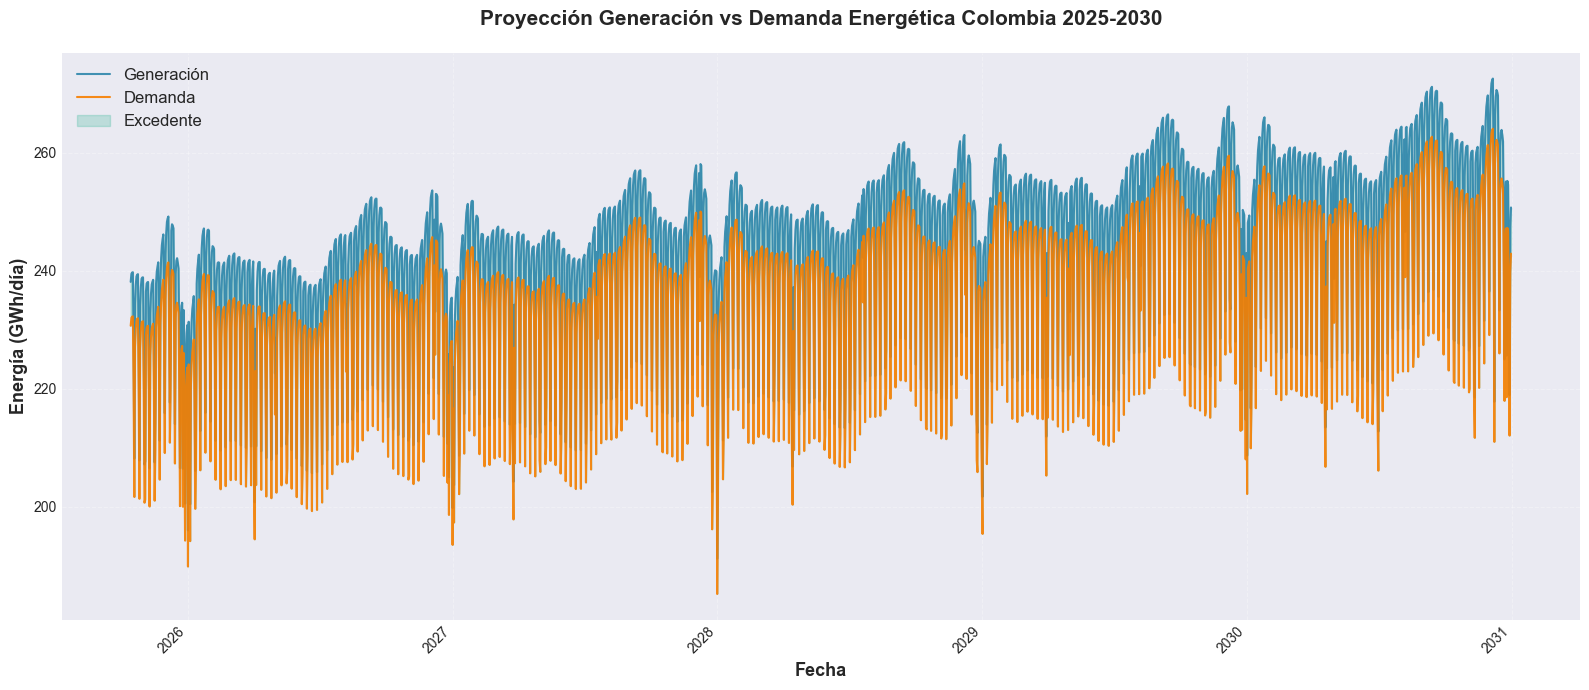


✓ Gráfica guardada: analisis_generacion_demanda.png


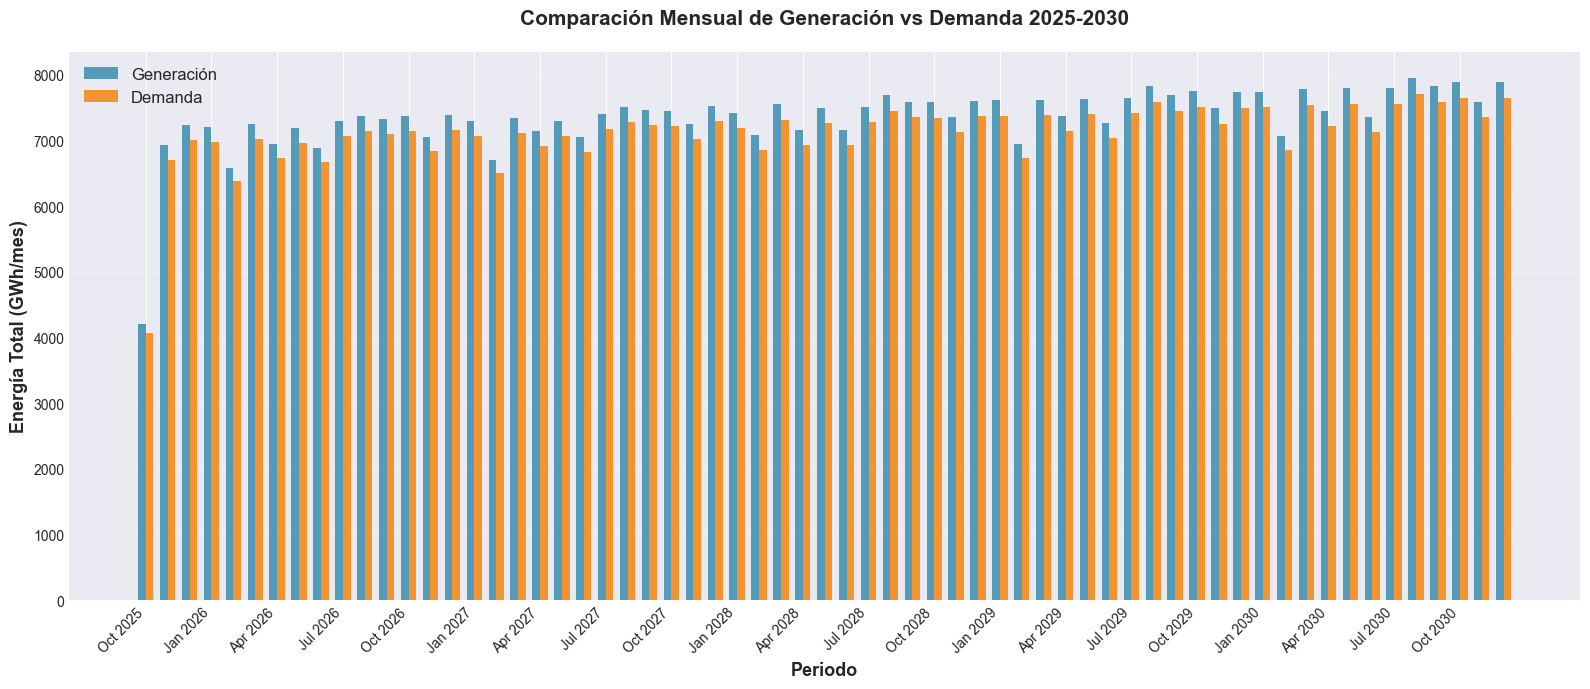

✓ Gráfica mensual guardada: analisis_mensual.png


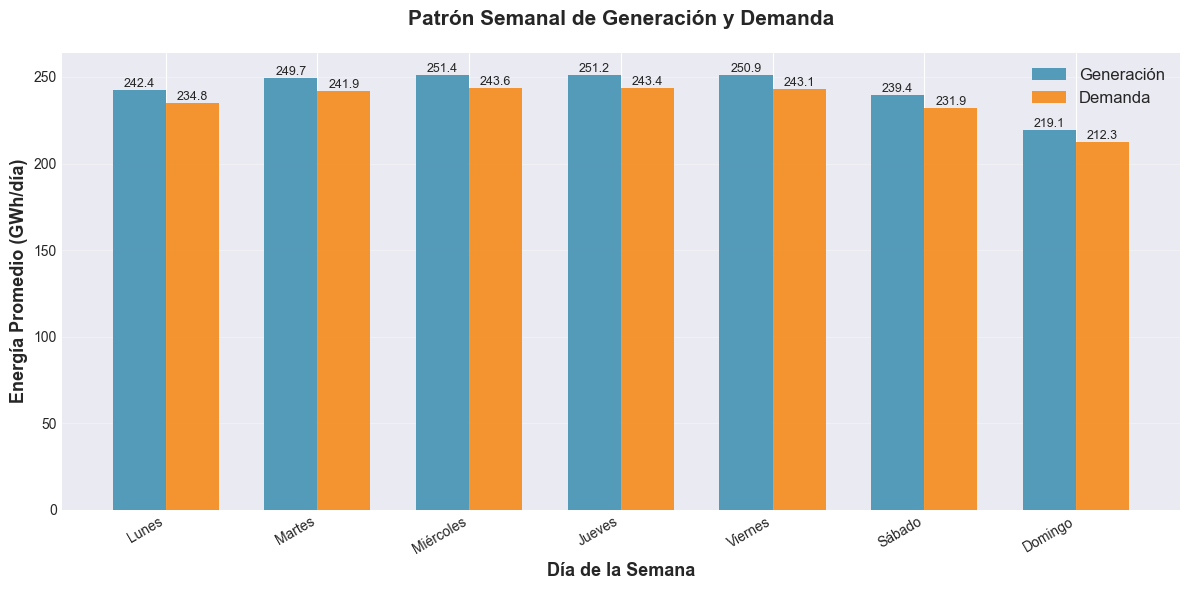

✓ Gráfica semanal guardada: patron_semanal.png


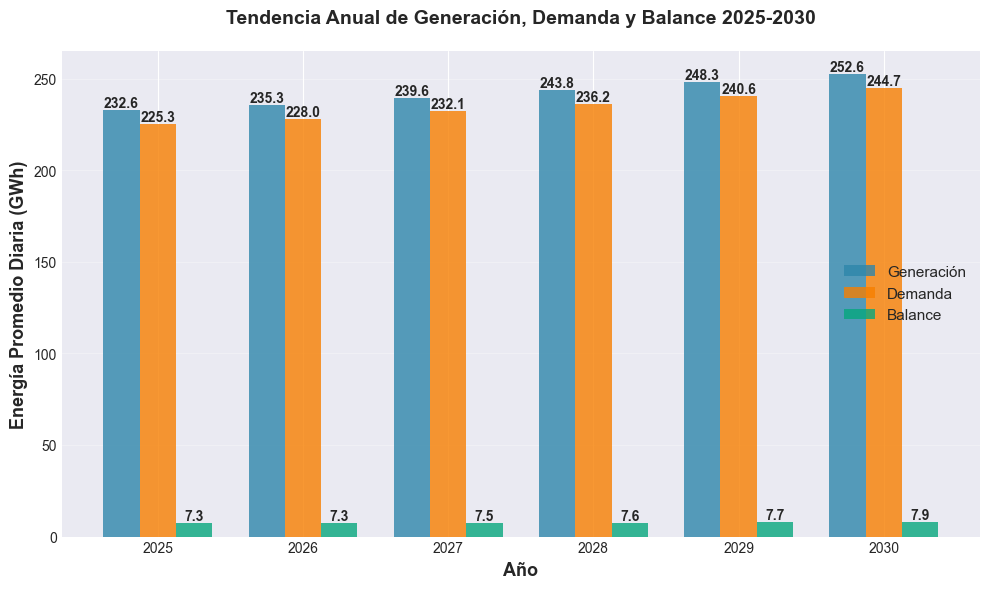

✓ Gráfica anual guardada: tendencia_anual.png

RESUMEN EJECUTIVO

..............................GENERACIÓN..............................
  Promedio 2025-2030: 243.44 GWh/día
  Mínimo: 191.17 GWh/día
  Máximo: 272.56 GWh/día
  Desviación estándar: 14.63 GWh

...............................DEMANDA................................
  Promedio 2025-2030: 235.85 GWh/día
  Mínimo: 185.21 GWh/día
  Máximo: 264.06 GWh/día
  Desviación estándar: 14.18 GWh

...............................BALANCE................................
  Excedente promedio: 7.60 GWh/día
  Excedente mínimo: 5.96 GWh/día
  Excedente máximo: 8.50 GWh/día

........................CRECIMIENTO 2025-2030.........................
  Generación: +8.58%
  Demanda: +8.58%

ANÁLISIS COMPLETADO

Archivos generados:
  ✓ analisis_generacion_demanda.png
  ✓ analisis_mensual.png
  ✓ patron_semanal.png
  ✓ tendencia_anual.png


In [57]:
"""
Análisis del comportamiento de Generación y Demanda 2025-2030
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# 1. CARGAR DATOS
# =============================================================================

df = pd.read_csv('predicciones_energia_2030_completo.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])

print("="*70)
print("ANÁLISIS DE PREDICCIONES ENERGÉTICAS 2025-2030")
print("="*70)
print(f"\nTotal de registros: {len(df)} días")
print(f"Rango de fechas: {df['Fecha'].min().date()} a {df['Fecha'].max().date()}")
print(f"\nPrimeras 5 filas:")
print(df.head())

# =============================================================================
# 2. ESTADÍSTICAS DESCRIPTIVAS
# =============================================================================

print("\n" + "="*70)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
print("\nGENERACIÓN:")
print(df['Generacion_GWh'].describe())
print("\nDEMANDA:")
print(df['Demanda_GWh'].describe())
print("\nBALANCE:")
print(df['Balance_GWh'].describe())

# =============================================================================
# 3. GRÁFICA PRINCIPAL: LÍNEAS DE TIEMPO
# =============================================================================

plt.style.use('seaborn-v0_8-darkgrid')  # Estilo profesional
fig, ax = plt.subplots(figsize=(16, 7))

# Graficar líneas
ax.plot(df['Fecha'], df['Generacion_GWh'], 
        label='Generación', color='#2E86AB', linewidth=1.5, alpha=0.9)
ax.plot(df['Fecha'], df['Demanda_GWh'], 
        label='Demanda', color='#F77F00', linewidth=1.5, alpha=0.9)

# Sombreado del excedente
ax.fill_between(df['Fecha'], df['Demanda_GWh'], df['Generacion_GWh'], 
                alpha=0.2, color='#06A77D', label='Excedente')

# Configuración
ax.set_xlabel('Fecha', fontsize=13, fontweight='bold')
ax.set_ylabel('Energía (GWh/día)', fontsize=13, fontweight='bold')
ax.set_title('Proyección Generación vs Demanda Energética Colombia 2025-2030', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('analisis_generacion_demanda.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfica guardada: analisis_generacion_demanda.png")

# =============================================================================
# 4. GRÁFICA: COMPARACIÓN MENSUAL
# =============================================================================

# Agregar columnas de año y mes
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month

# Agrupar por año y mes
df_mensual = df.groupby(['Año', 'Mes']).agg({
    'Generacion_GWh': 'sum',
    'Demanda_GWh': 'sum',
    'Balance_GWh': 'sum'
}).reset_index()

# Crear etiquetas de mes-año (CORREGIDO)
df_mensual['Periodo'] = pd.to_datetime(
    df_mensual[['Año', 'Mes']].rename(columns={'Año': 'year', 'Mes': 'month'}).assign(day=1)
)

fig, ax = plt.subplots(figsize=(16, 7))

# Barras agrupadas
x = np.arange(len(df_mensual))
width = 0.35

bars1 = ax.bar(x - width/2, df_mensual['Generacion_GWh'], width, 
               label='Generación', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x + width/2, df_mensual['Demanda_GWh'], width, 
               label='Demanda', color='#F77F00', alpha=0.8)

# Configuración
ax.set_xlabel('Periodo', fontsize=13, fontweight='bold')
ax.set_ylabel('Energía Total (GWh/mes)', fontsize=13, fontweight='bold')
ax.set_title('Comparación Mensual de Generación vs Demanda 2025-2030', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x[::3])  # Mostrar cada 3 meses
ax.set_xticklabels(df_mensual['Periodo'].dt.strftime('%b %Y')[::3], rotation=45, ha='right')
ax.legend(fontsize=12)
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('analisis_mensual.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfica mensual guardada: analisis_mensual.png")


# =============================================================================
# 5. GRÁFICA: DISTRIBUCIÓN SEMANAL
# =============================================================================

# Agregar día de la semana
df['DiaSemana'] = df['Fecha'].dt.day_name()
df['DiaSemanaNum'] = df['Fecha'].dt.dayofweek

# Promedios por día de semana
df_semanal = df.groupby('DiaSemana').agg({
    'Generacion_GWh': 'mean',
    'Demanda_GWh': 'mean'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

dias_es = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(dias_es))
width = 0.35

bars1 = ax.bar(x - width/2, df_semanal['Generacion_GWh'], width, 
               label='Generación', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x + width/2, df_semanal['Demanda_GWh'], width, 
               label='Demanda', color='#F77F00', alpha=0.8)

# Agregar valores en las barras
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Día de la Semana', fontsize=13, fontweight='bold')
ax.set_ylabel('Energía Promedio (GWh/día)', fontsize=13, fontweight='bold')
ax.set_title('Patrón Semanal de Generación y Demanda', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(dias_es, rotation=30, ha='right')
ax.legend(fontsize=12)
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('patron_semanal.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfica semanal guardada: patron_semanal.png")

# =============================================================================
# 6. GRÁFICA: TENDENCIA ANUAL
# =============================================================================

df_anual = df.groupby('Año').agg({
    'Generacion_GWh': 'mean',
    'Demanda_GWh': 'mean',
    'Balance_GWh': 'mean'
}).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

years = df_anual['Año']
x = np.arange(len(years))
width = 0.25

bars1 = ax.bar(x - width, df_anual['Generacion_GWh'], width, 
               label='Generación', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x, df_anual['Demanda_GWh'], width, 
               label='Demanda', color='#F77F00', alpha=0.8)
bars3 = ax.bar(x + width, df_anual['Balance_GWh'], width, 
               label='Balance', color='#06A77D', alpha=0.8)

# Valores en barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Año', fontsize=13, fontweight='bold')
ax.set_ylabel('Energía Promedio Diaria (GWh)', fontsize=13, fontweight='bold')
ax.set_title('Tendencia Anual de Generación, Demanda y Balance 2025-2030', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(fontsize=11)
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('tendencia_anual.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfica anual guardada: tendencia_anual.png")

# =============================================================================
# 7. RESUMEN NUMÉRICO
# =============================================================================

print("\n" + "="*70)
print("RESUMEN EJECUTIVO")
print("="*70)

print(f"\n{'GENERACIÓN':.^70}")
print(f"  Promedio 2025-2030: {df['Generacion_GWh'].mean():.2f} GWh/día")
print(f"  Mínimo: {df['Generacion_GWh'].min():.2f} GWh/día")
print(f"  Máximo: {df['Generacion_GWh'].max():.2f} GWh/día")
print(f"  Desviación estándar: {df['Generacion_GWh'].std():.2f} GWh")

print(f"\n{'DEMANDA':.^70}")
print(f"  Promedio 2025-2030: {df['Demanda_GWh'].mean():.2f} GWh/día")
print(f"  Mínimo: {df['Demanda_GWh'].min():.2f} GWh/día")
print(f"  Máximo: {df['Demanda_GWh'].max():.2f} GWh/día")
print(f"  Desviación estándar: {df['Demanda_GWh'].std():.2f} GWh")

print(f"\n{'BALANCE':.^70}")
print(f"  Excedente promedio: {df['Balance_GWh'].mean():.2f} GWh/día")
print(f"  Excedente mínimo: {df['Balance_GWh'].min():.2f} GWh/día")
print(f"  Excedente máximo: {df['Balance_GWh'].max():.2f} GWh/día")

# Crecimiento
crecimiento_gen = ((df[df['Año']==2030]['Generacion_GWh'].mean() / 
                    df[df['Año']==2025]['Generacion_GWh'].mean()) - 1) * 100
crecimiento_dem = ((df[df['Año']==2030]['Demanda_GWh'].mean() / 
                    df[df['Año']==2025]['Demanda_GWh'].mean()) - 1) * 100

print(f"\n{'CRECIMIENTO 2025-2030':.^70}")
print(f"  Generación: +{crecimiento_gen:.2f}%")
print(f"  Demanda: +{crecimiento_dem:.2f}%")

print("\n" + "="*70)
print("ANÁLISIS COMPLETADO")
print("="*70)
print("\nArchivos generados:")
print("  ✓ analisis_generacion_demanda.png")
print("  ✓ analisis_mensual.png")
print("  ✓ patron_semanal.png")
print("  ✓ tendencia_anual.png")
